In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4954 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3341 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3130 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8780
Test loss: 0.34932759404182434, Test accuracy: 87.8000020980835


In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.3.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)         

In [ ]:
# That's because the first convolution expects a single tensor containing everything, 
# so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1,
# and the same for the test images.

import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images = training_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

In [ ]:
# 1. The number of convolutions you want to generate. A value like ‘32' is a good starting point.
# 2. The size of the convolutional matrix, in this case a 3x3 grid.
# 3. The activation function to use, in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0.
# 4. In the first layer, the shape of the input data.

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                                    # By specifying (2,2) for the max-pooling, the effect is to reduce the size of the image by a factor of 4. 
                                    # The idea is that it creates a 2x2 array of pixels and picks the largest pixel value, thus turning 4 pixels into 1.
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    #Add another convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
                                    tf.keras.layers.Flatten(),
                                    #The same 128 dense layers, and 10 output layers as in the pre-convolution example:
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])

In [ ]:
# 26x26 shape because convolutions cut edges because they cannot apply 3x3 filters on them
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_acc*100))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0407 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0371 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0312 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9882
Epoch 8/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9903
Reached 99% accuracy so cancelling training!
313/313 [==============================] - 1s 2ms/step - loss: 0.5990 - accuracy: 0.9080
Test loss: 0.5989580154418945, Test accuracy: 90.79999

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


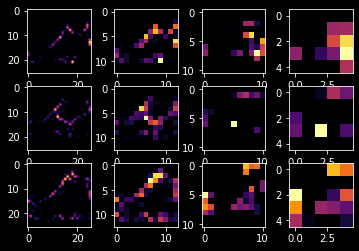

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
# Exercises:
# Try editing the convolutions. Change the number of convolutions from 32 to either 16 or 64. What impact will this have on accuracy and/or training time?
# Remove the final convolution. What impact will this have on accuracy or training time?
# How about adding more convolutions? What impact do you think this will have? Experiment with it.
# Remove all convolutions but the first. What impact do you think this will have? Experiment with it.